IMPIORT LIBRARY

In [21]:
import pandas as pd # untuk membaca dataset
import numpy as np # untuk perhitungan array
import matplotlib.pyplot as plt # untuk visualisasi
from scipy import stats # untuk operasi matriks
import seaborn as sns # untuk visualisasi
from sklearn.preprocessing import MinMaxScaler # untuk normalisasi data
from sklearn.preprocessing import LabelEncoder # untuk label encoding
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # untuk melatih data
from sklearn.neighbors import KNeighborsClassifier # untuk melatih model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # untuk evaluasi
from sklearn.tree import DecisionTreeClassifier # melatih model menggunakan Decision tree
from sklearn.ensemble import RandomForestClassifier # melatih model menggunakan menggunakan randomforest

Insight :

Mengimport library yang dibutuhkan untuk klasifikasi

GATHERING DATA

In [22]:
df_cancer = pd.read_csv("cancer dataframe.csv") # memanggil cancer dataframe
df_cancer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [23]:
df_cancer.head() # menampilkan cancer dataframe

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [24]:
df_cancer["Cancer_Type"].head() # menampilkan colomn Cancer_Type

0        Lung
1    Leukemia
2      Breast
3       Colon
4        Skin
Name: Cancer_Type, dtype: object

Insight : 

Menganalisis target data untuk diklasifikasi

DATA CLEANING

In [25]:
df_cancer.isnull().values.any() # menghapus outlier

np.False_

In [26]:
df_cancer.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [27]:
#cek data duplikat
df_cancer.duplicated().sum() 

np.int64(0)

VISUALISASI

<function matplotlib.pyplot.show(close=None, block=None)>

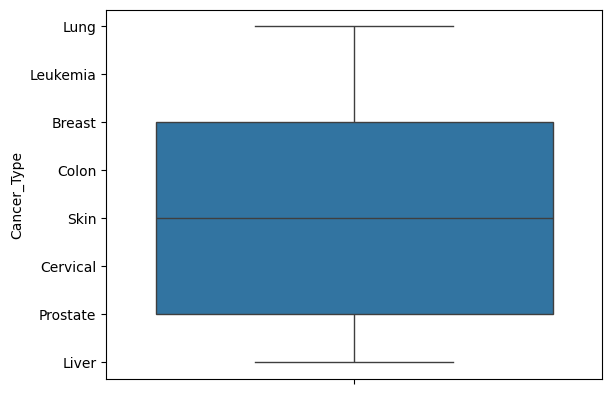

In [28]:
sns.boxplot(df_cancer["Cancer_Type"])
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

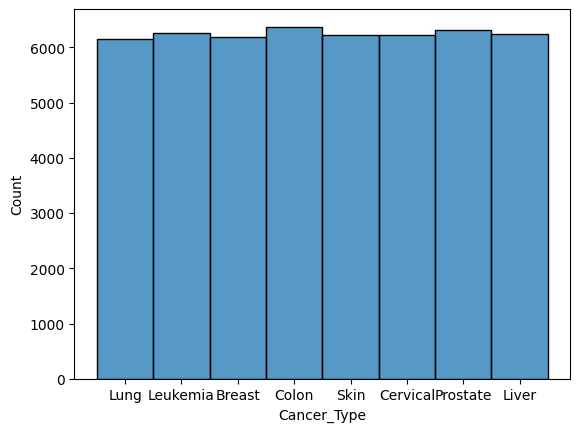

In [9]:
sns.histplot(df_cancer["Cancer_Type"])
plt.show

Insight :

- membersihkan outlier

- membersihkan data duplikat

PREPROCESSING


In [10]:
# Label Encoding 

le = LabelEncoder()
df_cancer["Cancer_Type_Encoded"] = le.fit_transform(df_cancer['Cancer_Type'])

In [11]:
# Split pemilihan fitur dan target 

x = df_cancer[['Smoking', 'Air_Pollution', "Survival_Years", "Alcohol_Use" ]]
y = df_cancer['Cancer_Type_Encoded']

In [12]:
# Split data 
X_train, X_test, Y_train, Y_test = train_test_split (
 x,y,
 test_size=0.2, 
 random_state=42,
 stratify= df_cancer['Cancer_Type']
 )



In [13]:
# inisialisasi Standartscaler
scaler = StandardScaler()

# fit dan transform data latih
x_train_scaled = scaler.fit_transform(X_train)

# transform pada data uji (menggunakan fit dari train)
X_test_scaled = scaler.transform(X_test)

# menampilkan contoh hasil 
print("\n contoh data sebelum di normalisasi :")
print(X_train.head())

print("\n contoh data sesudah di normalisasi : ")
print(pd.DataFrame(x_train_scaled, columns=X_train.columns).head())







 contoh data sebelum di normalisasi :
       Smoking  Air_Pollution  Survival_Years  Alcohol_Use
31058      0.1            3.1             1.8          8.6
23380      6.9            3.5             9.9          5.1
16852      1.6            7.0             1.7          8.4
27550      1.6            9.6             3.1          2.4
25754      0.4            2.0             1.0          6.5

 contoh data sesudah di normalisasi : 
    Smoking  Air_Pollution  Survival_Years  Alcohol_Use
0 -1.694624      -0.659139       -1.115992     1.242650
1  0.665090      -0.520711        1.697939     0.029880
2 -1.174099       0.690538       -1.150732     1.173349
3 -1.174099       1.590323       -0.664373    -0.905685
4 -1.590519      -1.039817       -1.393911     0.514988


In [14]:
model = KNeighborsClassifier (n_neighbors=5)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(Y_test, y_pred)
print(f"Akurasi Model : {acc* 100:.2f}%")

Akurasi Model : 12.97%


In [15]:
print("\n Classification Report :")
print(classification_report(Y_test, y_pred, target_names=le.classes_))


 Classification Report :
              precision    recall  f1-score   support

      Breast       0.12      0.25      0.16      1238
    Cervical       0.13      0.18      0.15      1244
       Colon       0.13      0.13      0.13      1275
    Leukemia       0.14      0.12      0.13      1253
       Liver       0.12      0.10      0.11      1250
        Lung       0.13      0.08      0.10      1232
    Prostate       0.14      0.10      0.11      1262
        Skin       0.14      0.09      0.10      1246

    accuracy                           0.13     10000
   macro avg       0.13      0.13      0.13     10000
weighted avg       0.13      0.13      0.13     10000



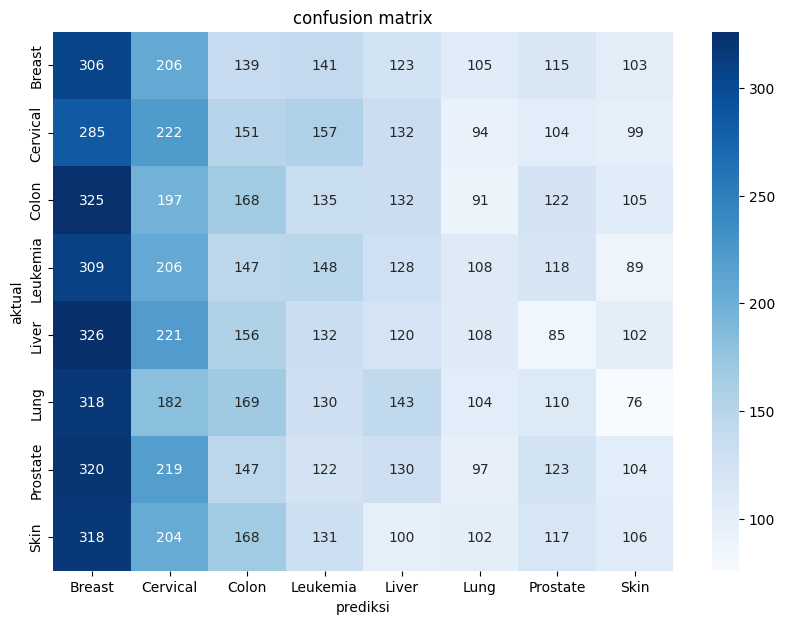

In [16]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues',
            xticklabels= le.classes_, yticklabels= le.classes_)
plt.xlabel("prediksi")
plt.ylabel("aktual")
plt.title("confusion matrix")
plt.show()



In [17]:
model = DecisionTreeClassifier (random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
print(f"Akurasi Model : {acc * 100:.2f}%")

Akurasi Model : 12.43%


In [18]:
print("\n classification report :")
print(classification_report(y_pred, Y_test, target_names=le.classes_))


 classification report :
              precision    recall  f1-score   support

      Breast       0.13      0.13      0.13      1318
    Cervical       0.13      0.13      0.13      1247
       Colon       0.13      0.14      0.13      1247
    Leukemia       0.11      0.12      0.12      1205
       Liver       0.10      0.10      0.10      1226
        Lung       0.12      0.12      0.12      1187
    Prostate       0.13      0.13      0.13      1282
        Skin       0.14      0.13      0.13      1288

    accuracy                           0.12     10000
   macro avg       0.12      0.12      0.12     10000
weighted avg       0.12      0.12      0.12     10000



<function matplotlib.pyplot.show(close=None, block=None)>

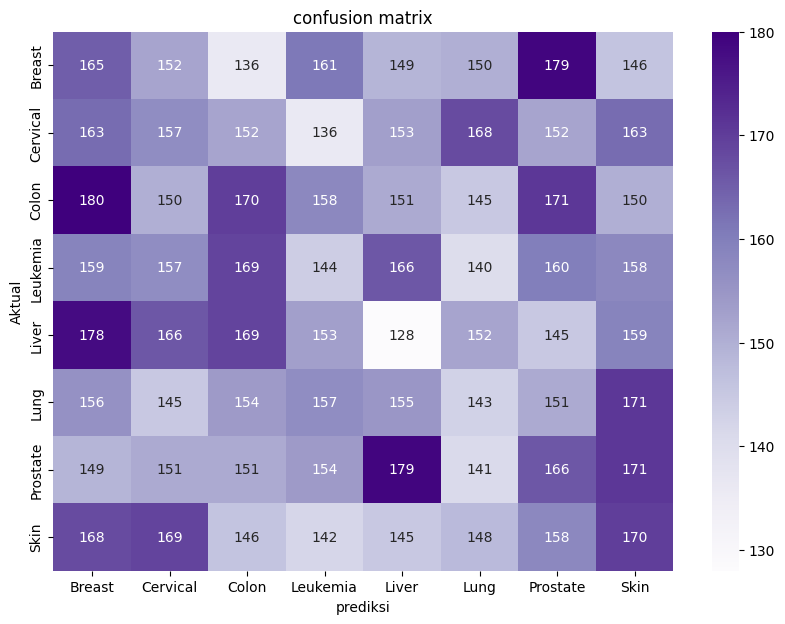

In [19]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("prediksi")
plt.ylabel('Aktual')
plt.title("confusion matrix")
plt.show


In [20]:
model = RandomForestClassifier (random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(Y_test, y_pred)
print(f"Akurasi Model : {acc * 100 :.2f}%")

Akurasi Model : 12.50%
